In [58]:
# import neccessary libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import joblib

In [59]:
# Read and explore the Data.
df = pd.read_csv('Telcom-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
# Show Shape data (Samples , Features)
df.shape

(7043, 21)

In [61]:
# Show More Information about Data using info() (Entries, Data Types, NuLL Values, And Memory Usage).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**The TotalCharges column is object because it sometimes has empty spaces which need to be converted to numerical values.**

In [62]:
# Convert TotalCharges column from object to numeric.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**There is no missing values in all columns except TotalCharges column because of it's converision type**

**So, we will replace these missing values with the medien rather than dropping** 

In [64]:
# Replace NaN values appears in TotalCharges column after conversion with median value of that column.
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [66]:
# Show Statistical Measure about Data using describe().
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [67]:
# Remove CustomerID column because it is not important.
df.drop('customerID', axis = 1, inplace = True)

In [68]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Explaratory Data Analysis (EDA) to Extract Insights and make Recommendations**

In [69]:
# Percentage of customers who left the company (Churn_rate)
Churn_rate = pd.DataFrame(df['Churn'].value_counts(normalize=True))
Churn_rate

,proportion
Churn,
No,0.73463
Yes,0.26537


C:\Users\dell\AppData\Local\Temp\ipykernel_14692\1849415966.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


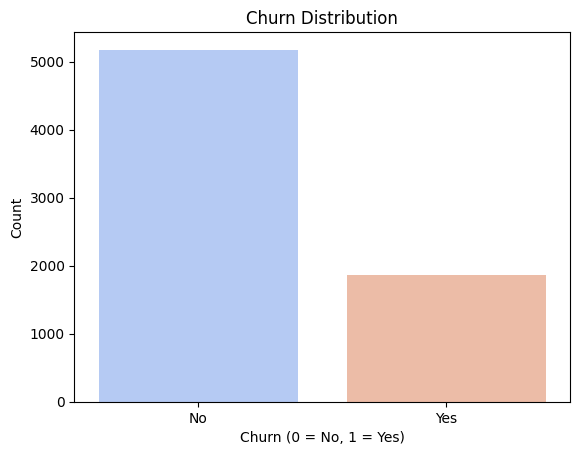

In [70]:
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

**Overall Churn Rate:**

No  = 73.46%

Yes = 26.54%


**The dataset shows a moderate class imbalance, with around 26.5% of customers churning.**

**Accuracy alone is misleading so we should use Recall, Precision, F1 Score  Or Applying Oversampling technique like SMOTE**


In [71]:
# Does the type of contract affect churn (churn_rate_by_Contract)?
churn_rate_by_Contract = pd.DataFrame(df.groupby('Contract')['Churn'].value_counts(normalize=True))
churn_rate_by_Contract

proportion
Contract       Churn            
Month-to-month No       0.572903
               Yes      0.427097
One year       No       0.887305
               Yes      0.112695
Two year       No       0.971681
               Yes      0.028319

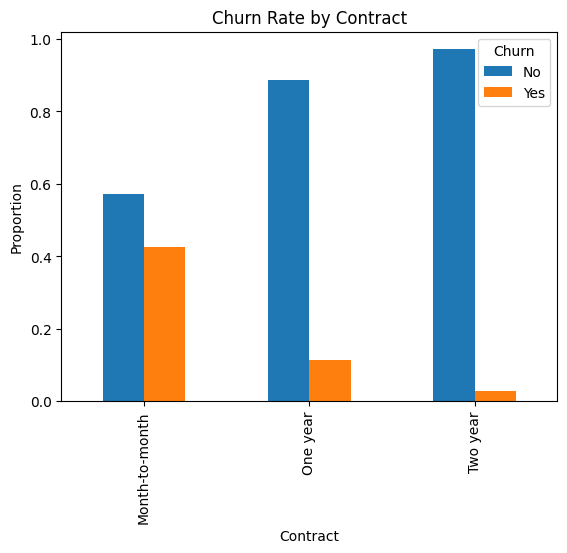

In [72]:
# Visualize (churn_rate_by_Contract)
pd.crosstab(df['Contract'], df['Churn'], normalize='index').plot(kind='bar')
plt.ylabel('Proportion')
plt.title('Churn Rate by Contract')
plt.show()

| Contract       | Churn Rate  |
| -------------- | ----------- |
| Month-to-month | **42.7%** ❌ |
| One year       | 11.3%       |
| Two year       | **2.8%** ✅  |

**Customers on month-to-month contracts exhibit significantly higher churn compared to long-term contract customers, making contract type a critical churn driver.**

In [73]:
# Do new customers leave more often (Churn_by_Tenure)?
Churn_by_Tenure = pd.DataFrame(df.groupby('Churn')['tenure'].describe())
Churn_by_Tenure

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


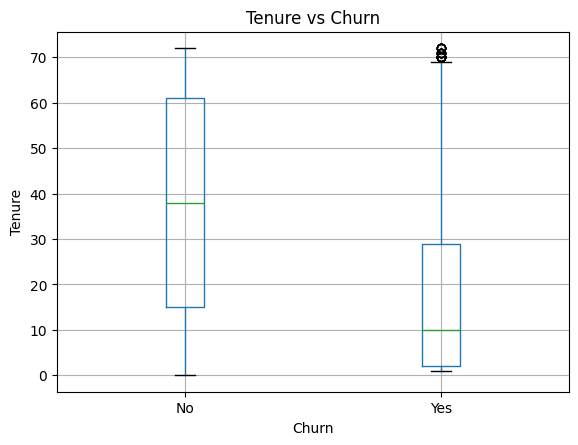

In [74]:
# Visualize (Churn_by_Tenure)
df.boxplot(column='tenure', by='Churn')
plt.title('Tenure vs Churn')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

| Churn | Mean Tenure  |
| ----- | ------------ |
| No    | **37.6 ~ 38 Months** |
| Yes   | **18 Months**   |

**Customers with shorter tenure are significantly more likely to churn, highlighting the importance of early-stage retention strategies.**

In [75]:
# Does the payment method affect whether the customer leaves? (Churn_by_Paymentmethod)
Churn_by_Paymentmethod = pd.DataFrame(df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True))
Churn_by_Paymentmethod

proportion
PaymentMethod             Churn            
Bank transfer (automatic) No       0.832902
                          Yes      0.167098
Credit card (automatic)   No       0.847569
                          Yes      0.152431
Electronic check          No       0.547146
                          Yes      0.452854
Mailed check              No       0.808933
                          Yes      0.191067

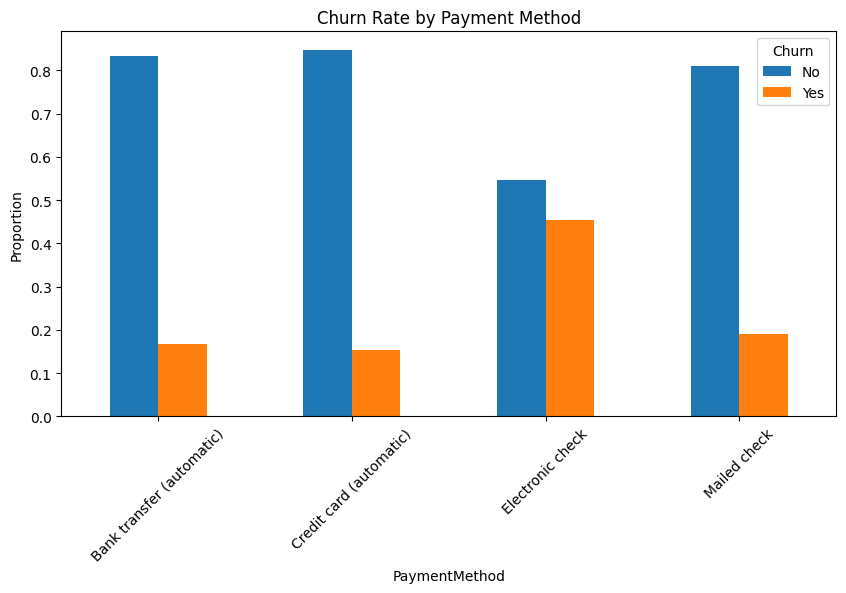

In [76]:
# Visualize (Churn_by_Paymentmethod)
pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index')\
  .plot(kind='bar', figsize=(10,5))

plt.ylabel('Proportion')
plt.title('Churn Rate by Payment Method')
plt.xticks(rotation=45)
plt.show()

| Payment Method       | Churn Rate  |
| -------------------- | ----------- |
| Electronic check     | **45.3%** ❌ |
| Mailed check         | 19.1%       |
| Bank transfer (auto) | 16.7%       |
| Credit card (auto)   | **15.2%** ✅ |

**Manual payment → friction → churn**

**Automatic payment → convenience → retention**

**Encouraging customers to switch from electronic checks to automatic payment methods could significantly reduce churn.**

In [77]:
# Does the type of internet connection affect churn? (Churn_by_InternetService)
Churn_by_InternetService = pd.DataFrame(df.groupby('InternetService')['Churn'].value_counts(normalize=True))
Churn_by_InternetService

proportion
InternetService Churn            
DSL             No       0.810409
                Yes      0.189591
Fiber optic     No       0.581072
                Yes      0.418928
No              No       0.925950
                Yes      0.074050

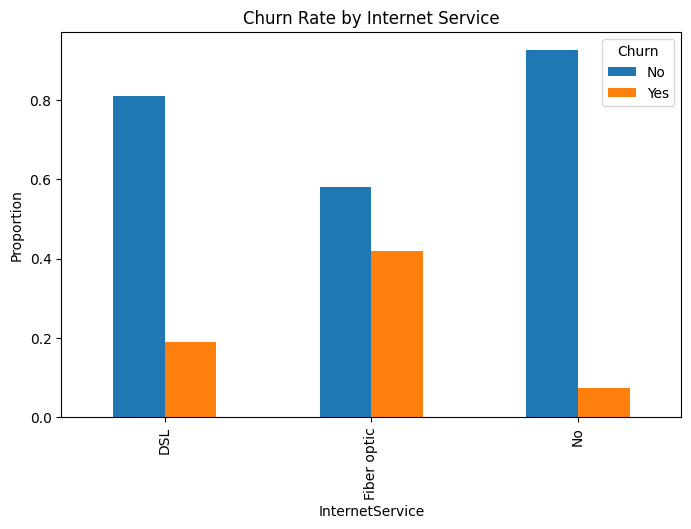

In [78]:
# Visualize (Churn_by_InternetService)
pd.crosstab(df['InternetService'], df['Churn'], normalize='index')\
  .plot(kind='bar', figsize=(8,5))

plt.ylabel('Proportion')
plt.title('Churn Rate by Internet Service')
plt.show()

| Internet Service | Churn Rate  |
| ---------------- | ----------- |
| Fiber optic      | **41.9%** ❌ |
| DSL              | 18.9%       |
| No internet      | **7.4%** ✅  |

**Despite being a premium service, fiber optic users exhibit the highest churn, possibly due to higher costs or service quality expectations.**

**Top Churn Drivers:**

Contract type

Tenure

Payment method

Internet service

**High-risk customer profile:**

Month-to-month + short tenure + electronic check + fiber optic

In [79]:
# Apply Lable Encoding on categorical Columns
labelencoder = LabelEncoder()
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for col in categorical_cols:
    df[col] = labelencoder.fit_transform(df[col])

In [80]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [81]:
# Define X , y and Split The Data to train & test
X = df.drop(['Churn'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [82]:
# Apply Feature Feature Scaling using StandarScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
# Model Training using Random forest classifier with balanced class weight.
clf = RandomForestClassifier(class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [84]:
# Model Evaluation using classification report to show accuracy, precision, recall, f1 score.
print("Result Before Applying SMOTE: ")
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1041
           1       0.61      0.46      0.53       368

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



**Explanation:**

Data imbalanced (higher number of non-churns)

Model biased towards Class 0

Defines non-churn very well

Missing many churners

**Very important:**

Recall = 0.46 → Model detected less than half of the customers who would leave

Accuracy is misleading here

**Business impact:**

❌ Customers leave without any intervention

❌ Loss in revenue

❌ Poor churn prevention

In [85]:
# Apply SMOTE to OverSample minority class to be equal for Majority.
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [86]:
# Retrain Model After SMOTE applied.
clf_SMOTE = RandomForestClassifier(class_weight='balanced')
clf_SMOTE.fit(X_train_smote, y_train_smote)
y_pred = clf_SMOTE.predict(X_test)

In [87]:
print("Result After Applying SMOTE: ")
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1041
           1       0.55      0.58      0.56       368

    accuracy                           0.77      1409
   macro avg       0.70      0.71      0.70      1409
weighted avg       0.77      0.77      0.77      1409



**Explanation:**

SMOTE now provides artificial churn examples.

The model now sees churn patterns more clearly.

It is now bolder in predicting churn.

**Key changes:**

Recall ↑ from 0.46 → 0.58

F1-score ↑ from 0.53 → 0.56

Precision ↓ slightly (expected)

**Applying SMOTE improved the model’s ability to detect churners by increasing recall and F1-score for the minority class, which aligns better with business objectives where missing a churner is more costly than falsely flagging a loyal customer.**

**Comparison:**

| Metric            | Before | After    | Interpretation            |
| ----------------- | ------ | -------- | ------------------------- |
| Recall (Churn)    | 0.46   | **0.58** | Capture more churn ✅     |
| Precision (Churn) | 0.61   | 0.55     | more false alarms ⚠️ |
| F1-score (Churn)  | 0.53   | **0.56** | More Balanced ✅             |
| Accuracy          | 0.78   | 0.77     | Not impoetant here            |


**Which is better?**

✅ After SMOTE is better

Because:

The goal isn't accuracy

The goal is minimizing lost churn

Higher recall = higher business value

**Finally:**

Before applying SMOTE, the model was biased toward the majority class and failed to detect many churners.

After applying SMOTE, the model achieved better recall and F1-score for the churn class, improving its ability to identify at-risk customers, which is more aligned with business objectives.

In [88]:
# Save Scaler for further deployment.
joblib.dump(scaler, 'Scaler_Churn.pkl')

['Scaler_Churn.pkl']

In [89]:
# Save the model after Applying SMOTE.
joblib.dump(clf_SMOTE, 'RFC_Churn.pkl')

['RFC_Churn.pkl']